### Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

### Задача 
1-Посмотреть на данные.

2-Проверить данные на пустые значения.

3-Проверить данные на дублированные/полностью скоррелированные значения.

4-Проверить данные на наличие выбросов.

5-Отобрать данные, пригодные для дальнейшего построения модели.

*При необходимости снова и снова возвращаться к предыдущим пунктам, пока модель не заработает как надо.

Предобработка данных:

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import scipy

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [3]:
stud = pd.read_csv('stud_math.csv')

In [4]:
def get_boxplot(column):
    """Строим графики чтобы посмотреть в каких столбцах у нас есть выбросы."""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column,
                data=stud,
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [5]:
def filter_outlier(col):
    """Функция для определения границ выбросов. (Использовать при необходимости)"""
    perc25 = stud.loc[:, col].quantile(0.25)
    perc75 = stud.loc[:, col].quantile(0.75)
    IQR = perc75 - perc25
    left = perc25 - 1.5*IQR
    right = perc75 + 1.5*IQR
    return [left, right]

In [6]:
def outlier_change_nan(list):
    """Функция для очистки данных от выбросов. Столбцы заполняются пустими значениями. (Использовать при необходимости)"""
    for out in list:
        border = filter_outlier(out)
        stud.loc[:, out] = stud.loc[:, out].apply(
            lambda x: None if x > border[1] else x)
        stud.loc[:, out] = stud.loc[:, out].apply(
            lambda x: None if x < border[0] else x)

In [7]:
def fill_fedu(row):
    """аполняет пустые значение 'Fedu'"""
    if pd.isnull(row['Fedu']):
        if row['Medu'] == 0:
            return 0
        if row['Medu'] == 1:
            return 1
        if row['Medu'] == 2:
            return 2
        if row['Medu'] == 3:
            return 3
        return 4
    return row['Fedu']

In [8]:
def fill_medu(row):
    """заполняет пустые значение 'Medu'."""
    if pd.isnull(row['Medu']):
        if row['Fedu'] == 0:
            return 0
        if row['Fedu'] == 1:
            return 1
        if row['Fedu'] == 2:
            return 2
        if row['Fedu'] == 3:
            return 3
        return 4
    return row['Medu']

In [9]:
def get_boxplot_obj(column):
    """функция строит boxplot для номинативных переменных"""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud,
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [10]:
def start_boxplor_object(coll):
    """Проходимся по списку колонок с номинативными переменными подставляя их в функцию для построения boxplot"""
    for col in selected_dtype_obj:
        get_boxplot_obj(col)

In [11]:
def get_stat_dif(column):
    """Ищем статистически значимые различия для колонки с номинативными переменными"""
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов: 

In [12]:
stud.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [13]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [14]:
# для удобства работы в pandas переименум столбец "studytime, granular" в "granular".
# Его нет в описании - возможно предстоит выяснить и узнать нужен он нам или нет!
stud.rename(columns={'studytime, granular': 'granular'}, inplace=True)
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

Дополнительная информация по столбцам:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи ('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [15]:
# смотрим какие типы данных у столбцов:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Мы видими что, у нас 13 числовых и 17 строковых столбцов. 30 колонок, 395 строк(школьников)
Рассмотрим теперь каждый столбец по отдельности.

Смотрим на пропущенные значения.
Мы видим, что в первых трех колонках нет пропущенных значений. Также можно отобразить визуально.

In [16]:
stud.isnull().sum()

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
granular       7
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

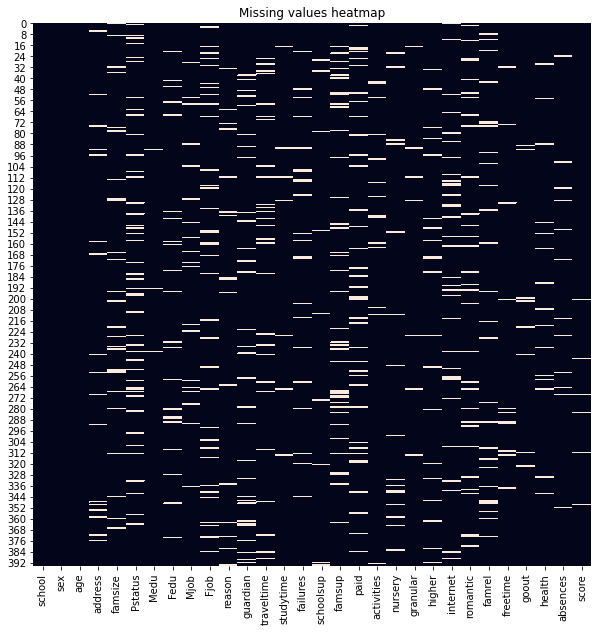

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(stud.isnull(), cbar=False).set_title("Missing values heatmap")

#### Обработка столбцов с чиловыми значениями.

Создадим список столбцов которые содержат числовые значения.

In [18]:
selected_dtype = stud.select_dtypes(include=['float64', 'int64']).columns

In [19]:
selected_dtype

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'granular', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'score'],
      dtype='object')

In [20]:
len(selected_dtype)  # Проверка: Должно получиться 13

13

Строим графики чтобы посмотреть в каких столбцах у нас есть выбросы. Для этого создадим функцию def get_boxplot(column).

Запускаем цикл по выбранным столбцам(int, float)

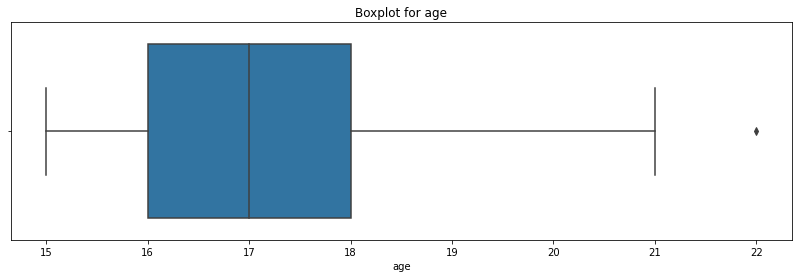

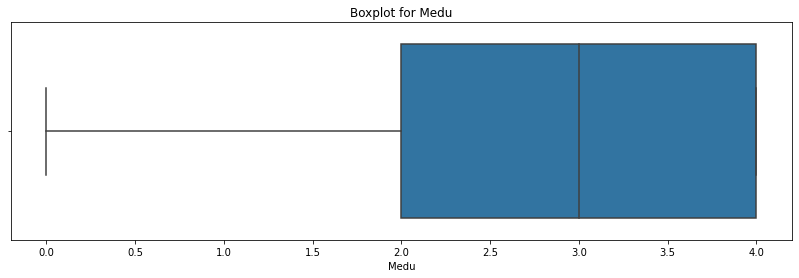

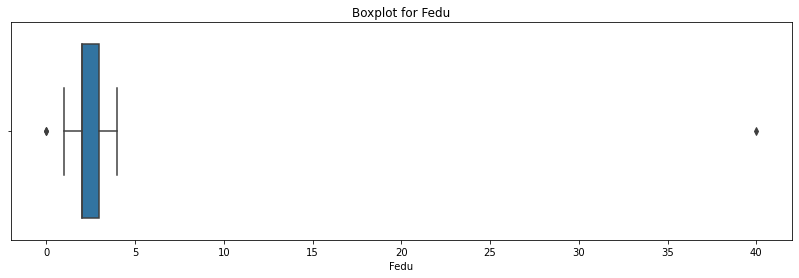

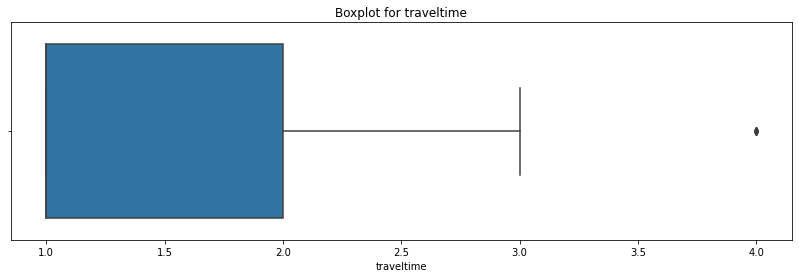

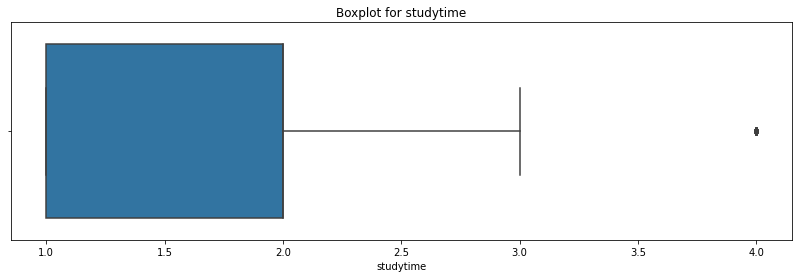

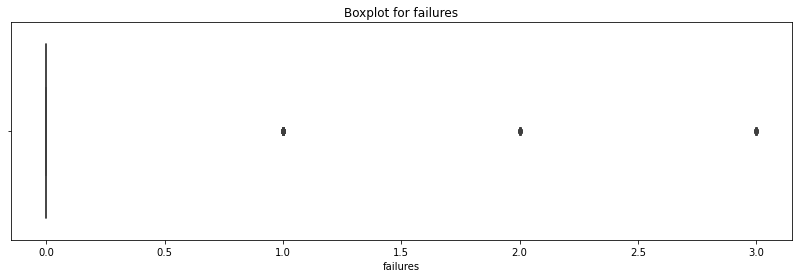

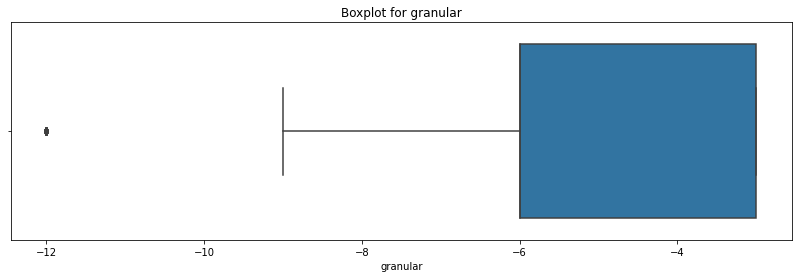

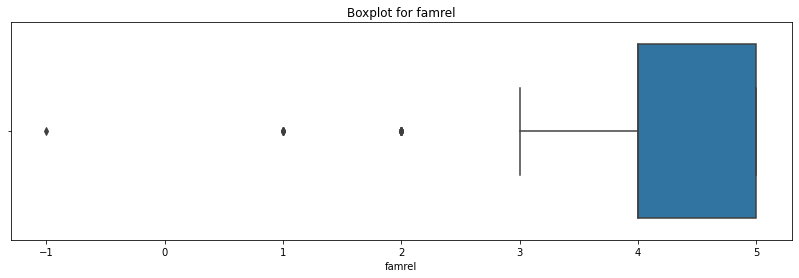

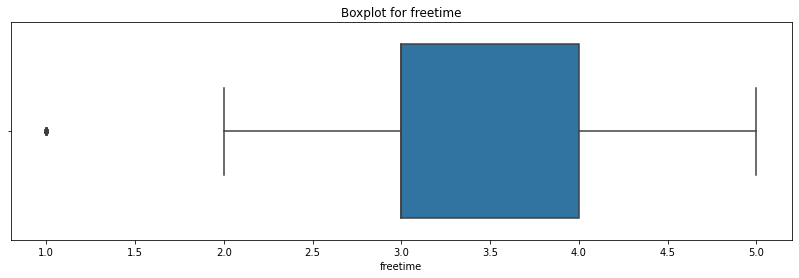

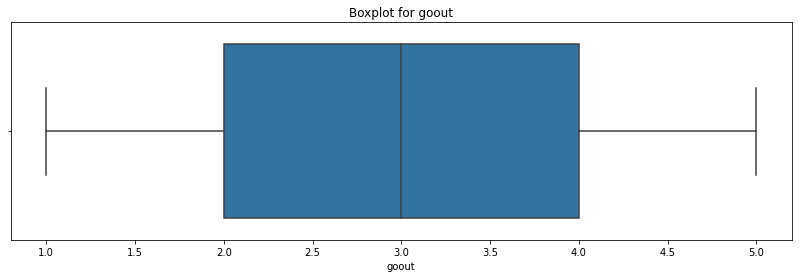

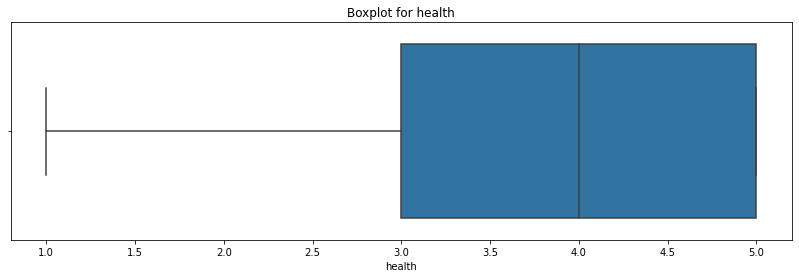

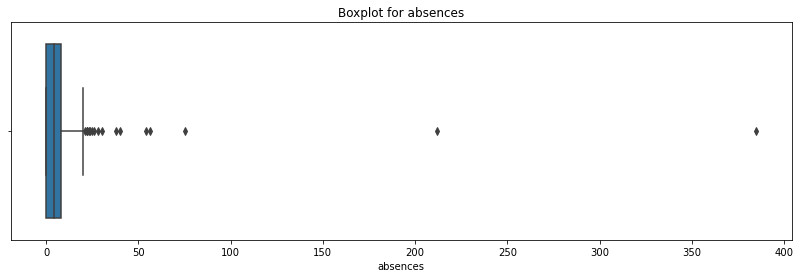

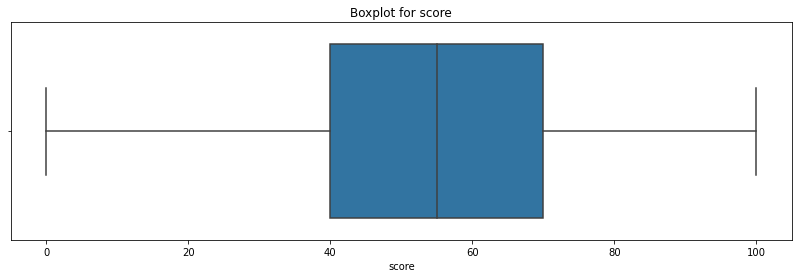

In [21]:
for col in selected_dtype:
    get_boxplot(col)

-Столбец 'age' - boxplot показал, что есть выброс (22 года) , но поскольку в задании нам нужно: "отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике" - соответсвенно оставляем возраст 22 года(+ это реальный возраст). 

-Столбец 'Fedu' - имеет реалный выброс со значением 40 - удаляем выброс.

-Столбец 'traveltime' показывает выброс, но это вполне реальное значение. Давайте его оставим.

-Столбец 'studytime' показывает выброс, но это вполне реальное значение. Давайте его оставим.

-Столбец 'failures' показывает выброс, но вполне реальное значение. Давайте его оставим.

-Столбец 'granular' имеет выброс, по скольку нам пока не известно значение данного столбца. Давайте его оставим. (*Заметка очень сильно похож на противоположность 'studytime')

-Столбец 'famrel' - имеет реалный выброс со значением '-1' - удаляем выброс в ручную. 

-Столбец 'freetime' показывает выброс, но вполне реальное значение. Давайте его оставим.

-Столбец 'absences' показывает выброс - самый максимальный из них 385. Если 'absences' принимает значения количество часов, то это вполне допустимо. Оставляем выброс.

Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

[percentile(25) -1.5IQR : percentile(75)+1.5IQR],

где IQR = percentile(75) - percentile(25). 
Для этого создадим функцию def filter_outlier(col). (Возможно в дальнейшем пригодится)

In [22]:
# список столбцов для очистки от выбросов.
# (Использовать при необходимости, если решим избавиться от всех выбросов.)
# outlier_int = selected_dtype

In [23]:
# Функция для очистки данных от выбросов. Столбцы заполняются пустими значениями. (Использовать при необходимости)
# outlier_change_nan(outlier_int)

Удалим только значение '-1' в колонке 'famrel' и  'Fedu' значение 40. Другие выбросы мы всегда сможем удалить при необходимости использовав функцию выше outlier_change_nan.

In [24]:
stud['famrel'] = stud['famrel'].apply(lambda x: None if x == -1 else x)
stud['Fedu'] = stud['Fedu'].apply(lambda x: None if x == 40 else x)
# stud['absences' ] = stud['absences' ].apply(lambda x: None if x > 20 else x)

Снова посмотрим на boxplot. Числовые данные  'famrel' и 'Fedu'  очищены от выбросов. 

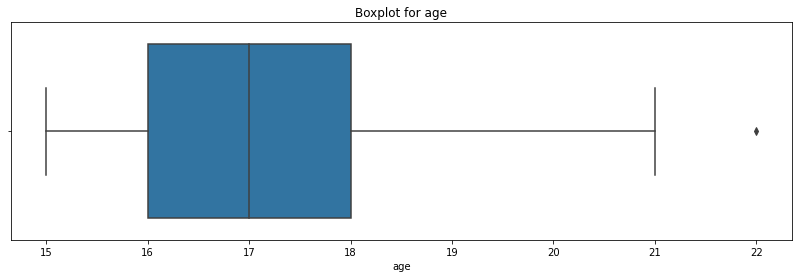

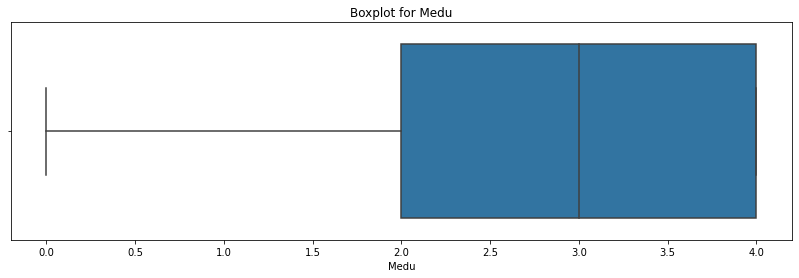

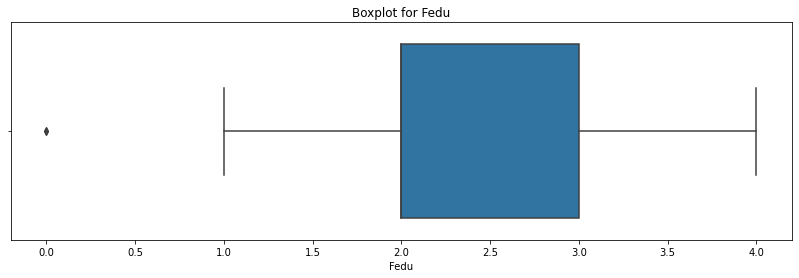

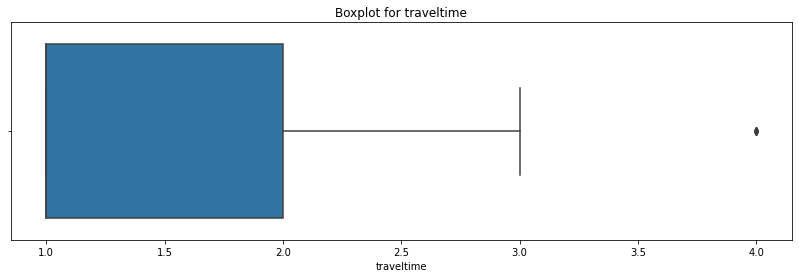

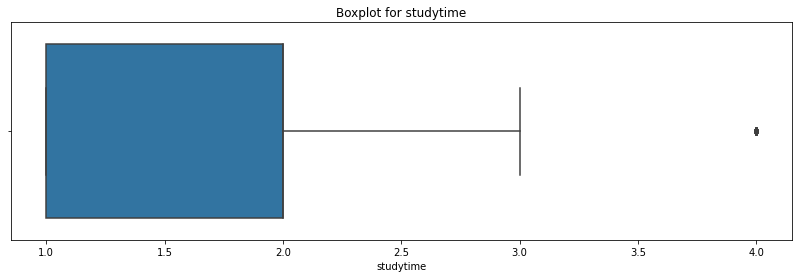

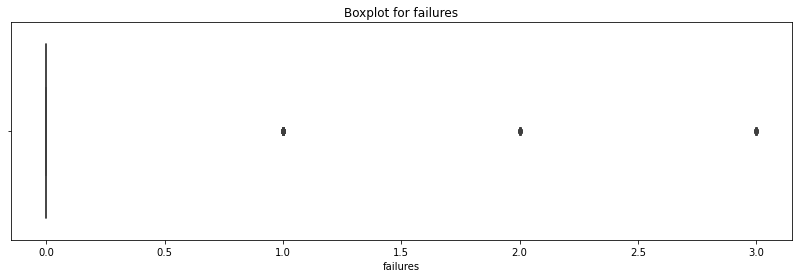

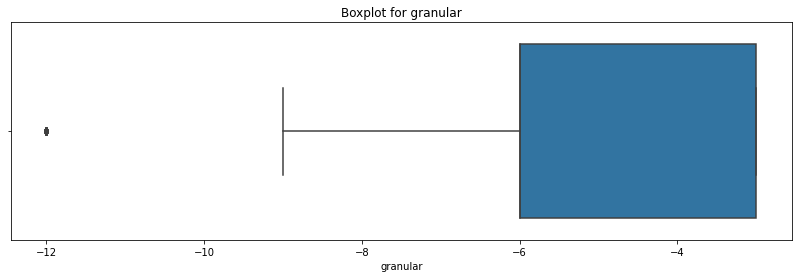

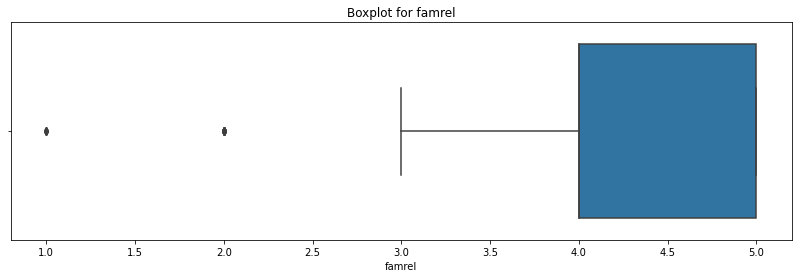

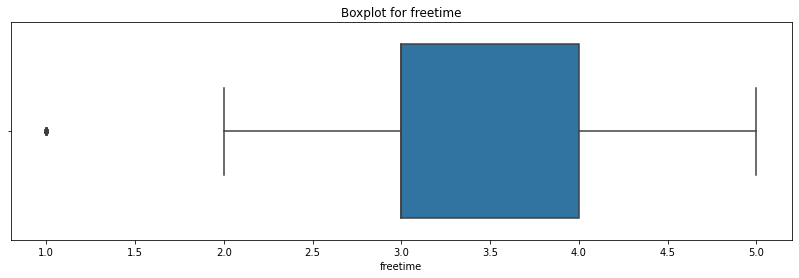

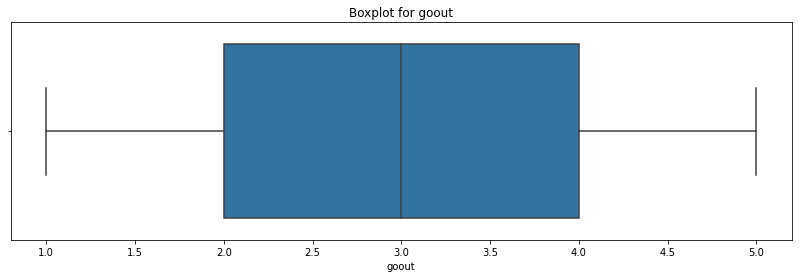

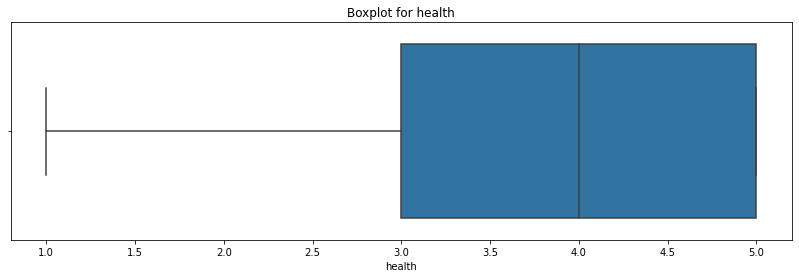

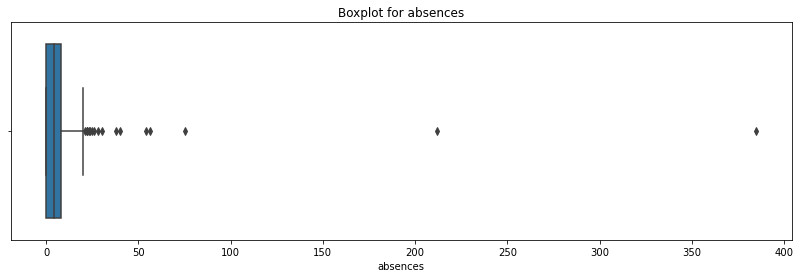

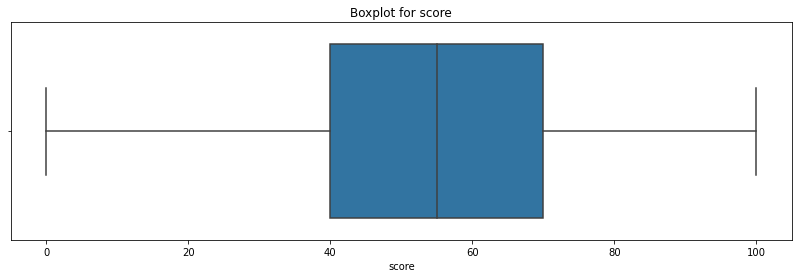

In [25]:
for col in selected_dtype:
    get_boxplot(col)

Для количественных переменных построем гистограммы распределений.

<AxesSubplot:>

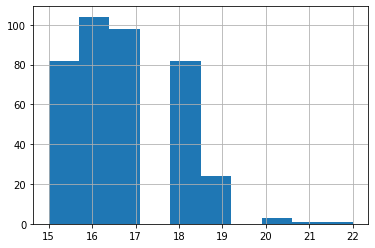

In [26]:
stud['age'].hist()

<AxesSubplot:xlabel='age'>

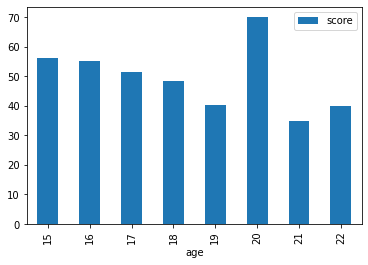

In [27]:
stud.pivot_table(values="score", index='age', aggfunc='mean').plot(kind='bar')

<AxesSubplot:title={'center':'Распределние оценок относительно возраста'}, xlabel='age', ylabel='score'>

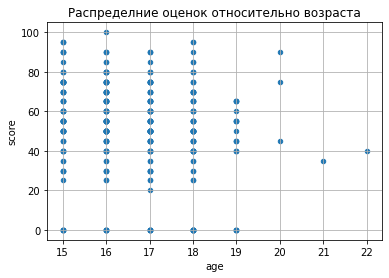

In [28]:
stud.plot(x='age', y='score', kind='scatter', grid=True,
          title='Распределние оценок относительно возраста')

Как мы видим большинство учащихся с возрастом от 15 до 19 лет. Кучность оценок примерно распложено от 20 до 100 баллов. Вероятно возможно удалить возраст больше 19 лет и 0 баллы.

Перейдем к столбцу Medu/Fedu — образование матери/отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

<AxesSubplot:>

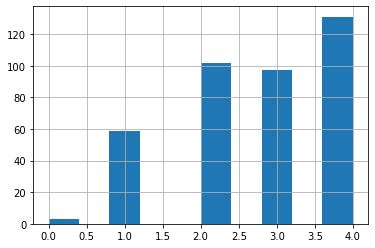

In [29]:
stud['Medu'].hist()

<AxesSubplot:xlabel='Medu'>

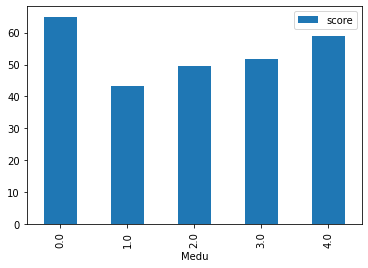

In [30]:
stud.pivot_table(values="score", index='Medu', aggfunc='mean').plot(kind='bar')

<AxesSubplot:title={'center':'Распределние оценок относительно образвания матери'}, xlabel='Medu', ylabel='score'>

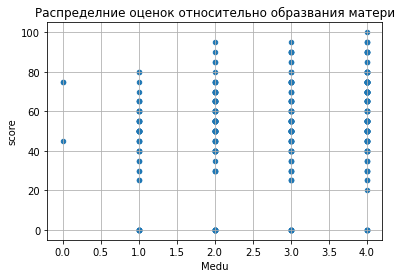

In [31]:
stud.plot(x='Medu', y='score', kind='scatter', grid=True,
          title='Распределние оценок относительно образвания матери')

Исходя из кучности показателей, если отсеч в Medu 0 показатели(их слишком мало), то мы увидим прямую зависимость роста оценок от образования матери.

<AxesSubplot:>

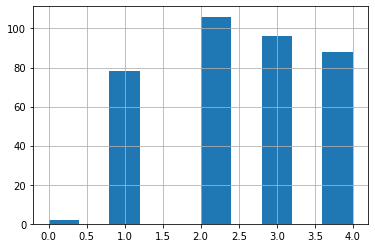

In [32]:
stud['Fedu'].hist()

<AxesSubplot:xlabel='Fedu'>

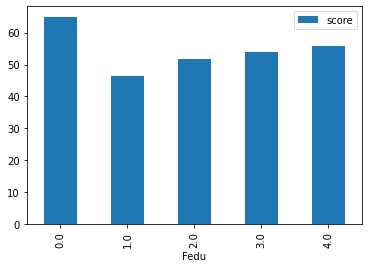

In [33]:
stud.pivot_table(values="score", index='Fedu', aggfunc='mean').plot(kind='bar')

<AxesSubplot:title={'center':'Распределние оценок относительно образвания отца'}, xlabel='Fedu', ylabel='score'>

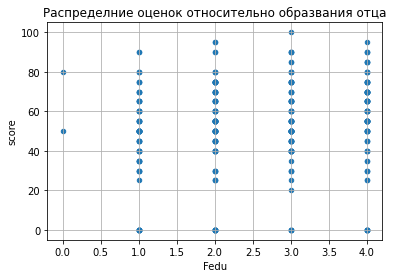

In [34]:
stud.plot(x='Fedu', y='score', kind='scatter', grid=True,
          title='Распределние оценок относительно образвания отца')

In [35]:
sns.set()

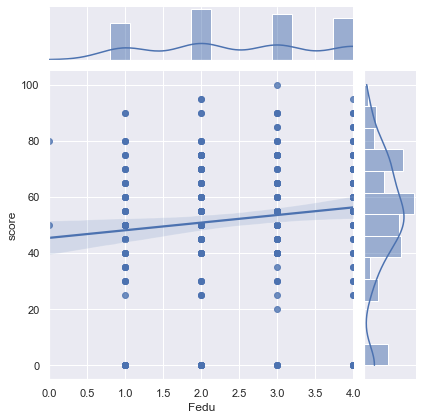

In [36]:
sns.jointplot(x='Fedu', y='score', data=stud, kind='reg')

Тоже самое. Исходя из кучности показателей, если отсеч в Fedu 0 показатели(их слишком мало), то мы увидим прямую зависимость роста оценок от образования отца.

Перейдем к traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

<AxesSubplot:>

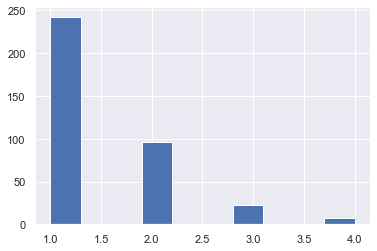

In [37]:
stud['traveltime'].hist()

<AxesSubplot:xlabel='traveltime'>

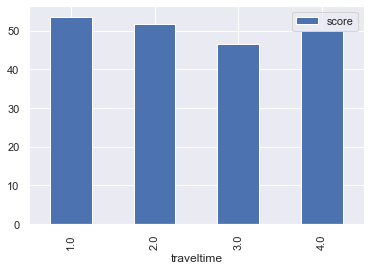

In [38]:
stud.pivot_table(values="score", index='traveltime',
                 aggfunc='mean').plot(kind='bar')

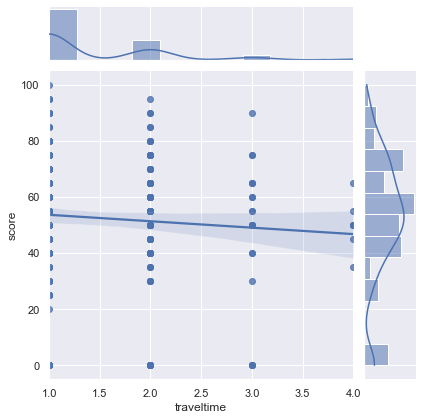

In [39]:
sns.jointplot(x='traveltime', y='score', data=stud, kind='reg')

Исходя из этих показателей можно сказать, что долгое время в пути до школы негативно сказывается для учашихся. Возмжно им приходится раньше вставать, не досыпание негативно влияет на успеваемость. 

Перейдем к studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

<AxesSubplot:xlabel='время на учебу', ylabel='баллы по математике'>

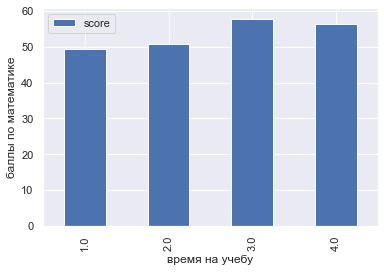

In [40]:
stud.pivot_table(values="score", index='studytime', aggfunc='mean').plot(
    kind='bar', xlabel='время на учебу', ylabel='баллы по математике')

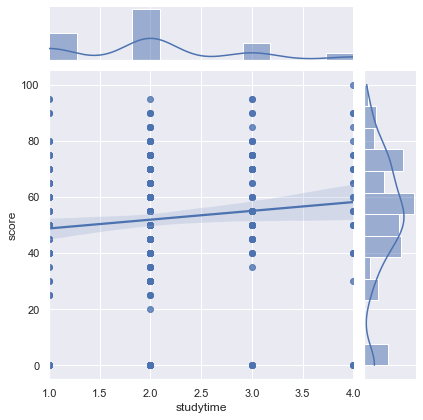

In [41]:
sns.jointplot(x='studytime', y='score', data=stud, kind='reg')

Судя по графикам, чаще всего на учебу помим школы тратя 2 часа. Видна положительная реакция на успеваемость по математке.

 Перейдем к failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

<AxesSubplot:>

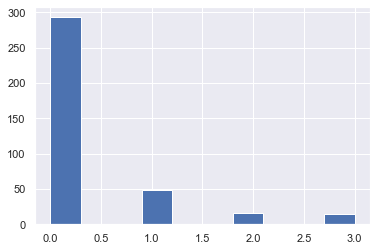

In [42]:
stud['failures'].hist()

<AxesSubplot:xlabel='failures'>

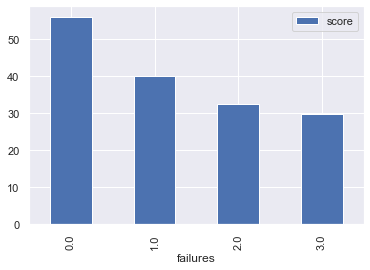

In [43]:
stud.pivot_table(values="score", index='failures',
                 aggfunc='mean').plot(kind='bar')

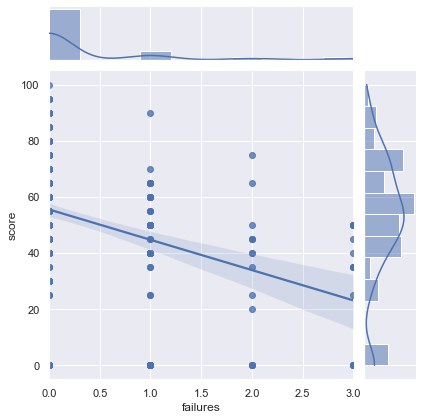

In [44]:
sns.jointplot(x='failures', y='score', data=stud, kind='reg')

Количество внеучебных неудач, не смотря на то что их мало. Могут сильно повлиять в отрицательную сторону на успеваемость.

Перейдем к  famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

<AxesSubplot:>

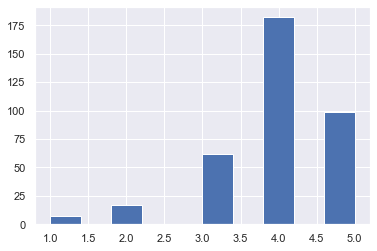

In [45]:
stud['famrel'].hist()

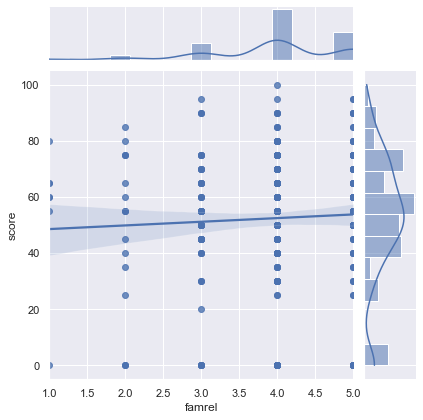

In [46]:
sns.jointplot(x='famrel', y='score', data=stud, kind='reg')

Во основном преобладают хорошие отношения, которые положительно влияют на баллы.

Перейдем к  freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

<AxesSubplot:>

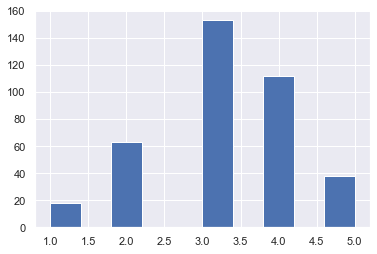

In [47]:
stud['freetime'].hist()

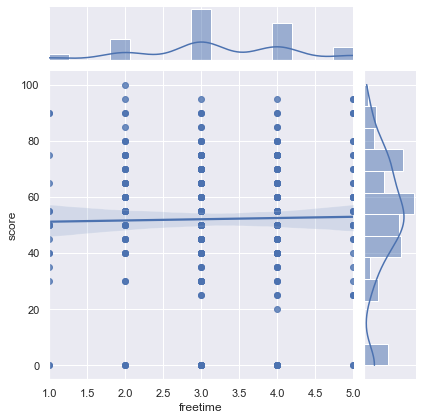

In [48]:
sns.jointplot(x='freetime', y='score', data=stud, kind='reg')

Свободное время после школы имеет очень слабое влияние на баллы. 

 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

<AxesSubplot:>

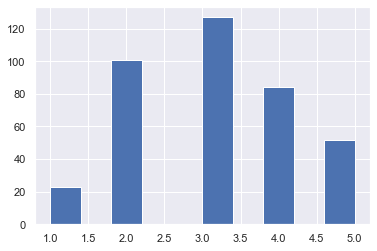

In [49]:
stud['goout'].hist()

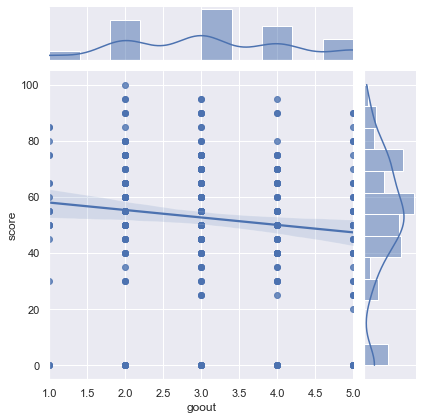

In [50]:
sns.jointplot(x='goout', y='score', data=stud, kind='reg')

Продолжительное гуляние с друзьями приводит к плохим баллам.

Перейдем к health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

<AxesSubplot:>

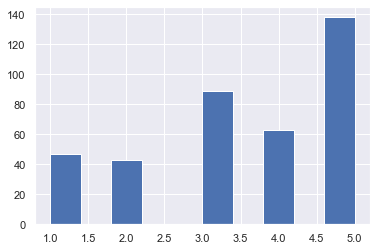

In [51]:
stud['health'].hist()

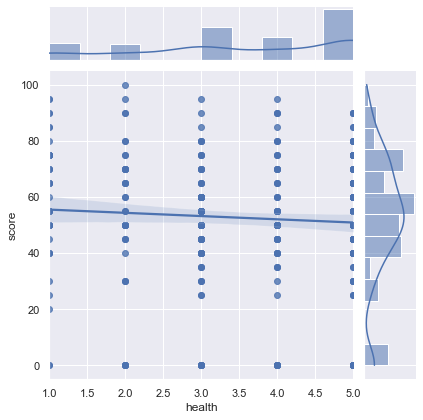

In [52]:
sns.jointplot(x='health', y='score', data=stud, kind='reg')

Имеется негативное влияние здоровья на баллы. Тут нельзя сказать что, имеется прямая зависимость. Скорее всего учащиееся с хорошими показателями здоровья больше занимаются спортом а не математикой.

Перейдем к absences — количество пропущенных занятий

<AxesSubplot:>

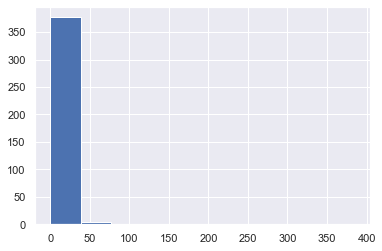

In [53]:
stud['absences'].hist()

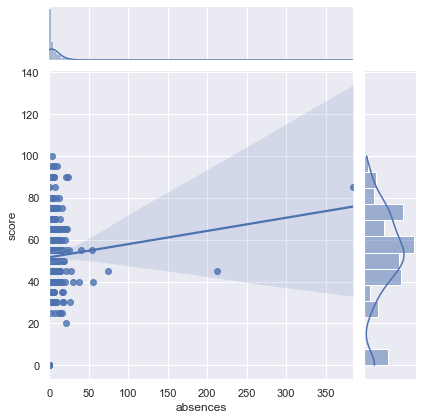

In [54]:
sns.jointplot(x='absences', y='score', data=stud, kind='reg')

Возможно в данном случае следует удалить все выбросы. Давайте это сделаем воспользовавшись функцией outlier_change_nan(list)

In [55]:
outlier_change_nan(['absences'])

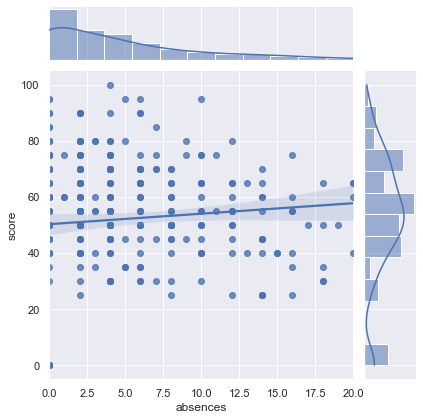

In [56]:
sns.jointplot(x='absences', y='score', data=stud, kind='reg')

Не смотря на то, что мы удалили выбросы положительная тендеция при росте пропущенных занятий осталась. Скорее всего это не прямое влияние. Возможно имееются какие-то др. факторы влияния. 

Смотрим на корреляцию по столбцам.

In [57]:
stud.corr()  # absences == 0.08 без выбросов. c выбросом 0.065

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.159546,0.081508,-0.015556,0.228047,0.015556,0.063539,0.029023,0.135107,-0.065946,0.151493,-0.155726
Medu,-0.161704,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.078589,-0.020896,0.025335,0.064164,-0.045051,0.065712,0.213349
Fedu,-0.159546,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.008603,-0.035788,-0.021415,0.046581,0.022588,-0.021415,0.130002
traveltime,0.081508,-0.173515,-0.155459,1.000000,-0.102206,0.064699,0.102206,-0.028220,-0.021937,0.037636,-0.021531,-0.047995,-0.070559
studytime,-0.015556,0.078589,0.008603,-0.102206,1.000000,-0.178992,-1.000000,0.028918,-0.121969,-0.051280,-0.080016,-0.078099,0.115741
failures,0.228047,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.178992,0.011942,0.098382,0.120914,0.081284,0.081801,-0.344338
granular,0.015556,-0.078589,-0.008603,0.102206,-1.000000,0.178992,1.000000,-0.028918,0.121969,0.051280,0.080016,0.078099,-0.115741
famrel,0.063539,-0.020896,-0.035788,-0.028220,0.028918,0.011942,-0.028918,1.000000,0.164324,0.069241,0.097910,-0.073509,0.051219
freetime,0.029023,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.121969,0.164324,1.000000,0.296437,0.061575,0.093436,0.019026
goout,0.135107,0.064164,0.046581,0.037636,-0.051280,0.120914,0.051280,0.069241,0.296437,1.000000,-0.015608,0.111587,-0.129685


В таблице видно что, столбцы 'granular' и 'studytime' имеют -1 кореляцию. 

<AxesSubplot:>

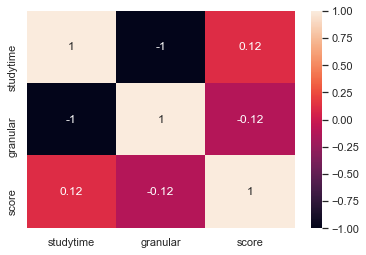

In [58]:
stud_1 = stud[['studytime', 'granular', 'score']]
sns.heatmap(stud_1.corr(), annot=True)

На графике видно что, имеется прямая зависимость 'studytime' на 'granular'. Давайте удалим столбец 'granular'.

In [59]:
stud.drop(['granular'], axis=1, inplace=True)

<AxesSubplot:>

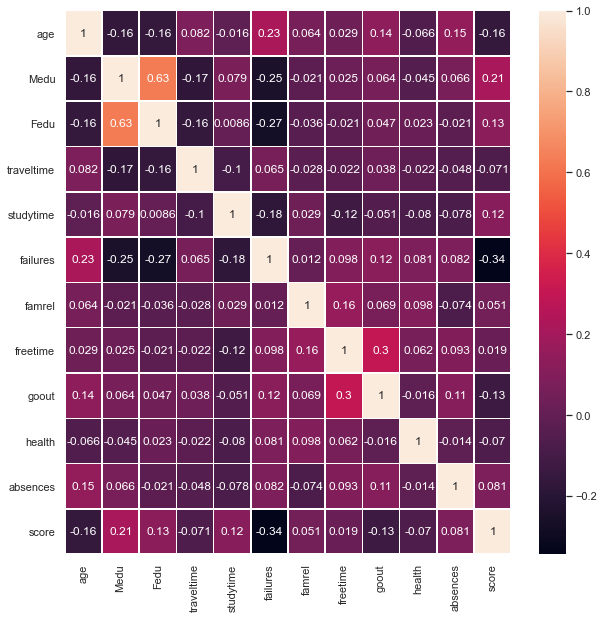

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(stud.corr(), annot=True, linewidths=.5, ax=ax)

У нас есть также средняя корреляция(0.63) между 'Fedu' и 'Medu'. Это значит у нас есть некоторая взаимосвязь между этими столбцами. т.е. к примеру если значение 'Fedu' == 4.0 то и в 'Medu' возможно стоит это же значение. Один из этих столбцов можно просто удалить либо (для тренировки) выполним взаимозаполнения пустых значений в этих столбцах.(Данное решение принято по согласованию с ментором т.к. работа творческая..) 

Создадим функции def fill_fedu(row), def fill_medu(row), которые будут заполнять пустые значение 'Fedu' и 'Medu'.

In [61]:
stud['Fedu'] = stud.apply(fill_fedu, axis=1)
stud['Medu'] = stud.apply(fill_medu, axis=1)

Поскольку 'Fedu' и 'Medu' заполнены на 100%, заполняем оставшиеся числовые столбцы их средним значением. 

In [62]:
stud.fillna(round(stud.mean()), inplace=True)

In [63]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160621,-0.166041,0.084755,-0.015355,0.228081,0.061386,0.026443,0.134069,-0.063892,0.147270,-0.153481
Medu,-0.160621,1.000000,0.654614,-0.156120,0.077082,-0.244345,-0.017750,0.022993,0.061687,-0.042975,0.066681,0.216653
Fedu,-0.166041,0.654614,1.000000,-0.141489,-0.000353,-0.257356,-0.030468,-0.000517,0.056470,0.026196,0.001733,0.136145
traveltime,0.084755,-0.156120,-0.141489,1.000000,-0.094637,0.049670,-0.024643,-0.012496,0.051775,-0.044842,-0.037482,-0.056016
studytime,-0.015355,0.077082,-0.000353,-0.094637,1.000000,-0.166598,0.027181,-0.119014,-0.051090,-0.073674,-0.077290,0.114074
failures,0.228081,-0.244345,-0.257356,0.049670,-0.166598,1.000000,0.003015,0.094826,0.113649,0.075849,0.083527,-0.328451
famrel,0.061386,-0.017750,-0.030468,-0.024643,0.027181,0.003015,1.000000,0.156711,0.066468,0.096586,-0.067694,0.048633
freetime,0.026443,0.022993,-0.000517,-0.012496,-0.119014,0.094826,0.156711,1.000000,0.292305,0.060557,0.082111,0.017298
goout,0.134069,0.061687,0.056470,0.051775,-0.051090,0.113649,0.066468,0.292305,1.000000,-0.014274,0.106248,-0.127048
health,-0.063892,-0.042975,0.026196,-0.044842,-0.073674,0.075849,0.096586,0.060557,-0.014274,1.000000,-0.016771,-0.072955


#### Теперь перейдем к столбцам с номинативными переменными. 


Делаем список столбцов которые содержат object(номинативные значения). 

In [64]:
selected_dtype_obj = stud.select_dtypes(include=['object']).columns
selected_dtype_obj

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [65]:
len(selected_dtype_obj)  # Проверка: Должно получится 17

17

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Строим графики boxplot:

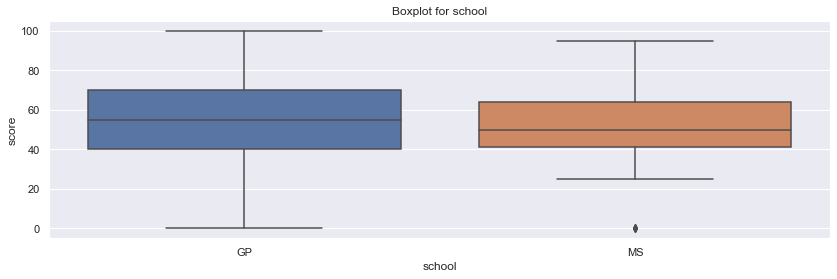

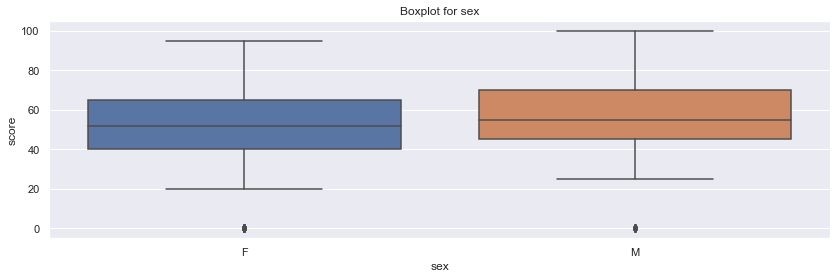

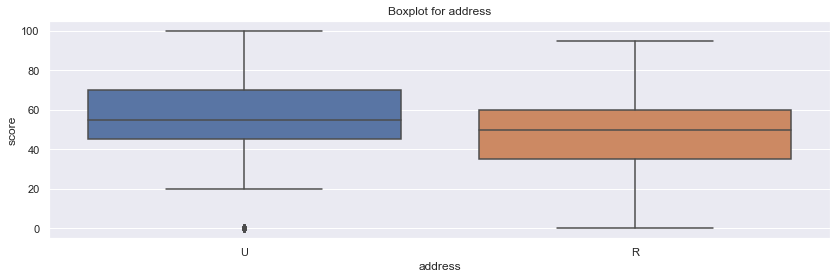

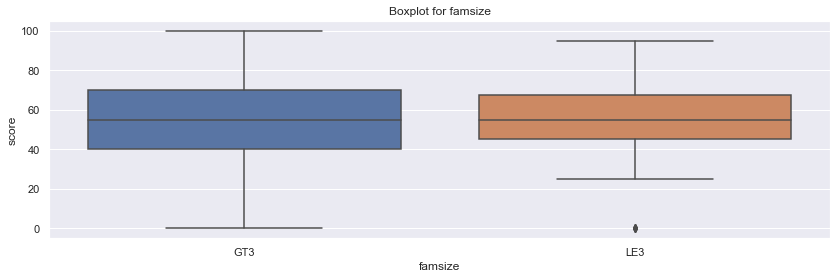

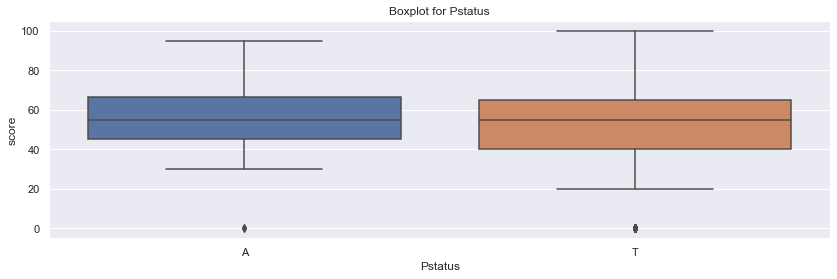

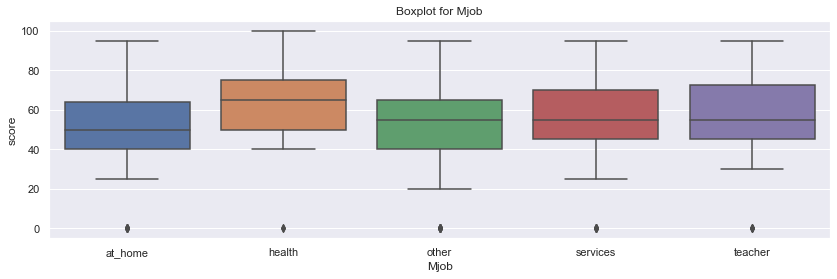

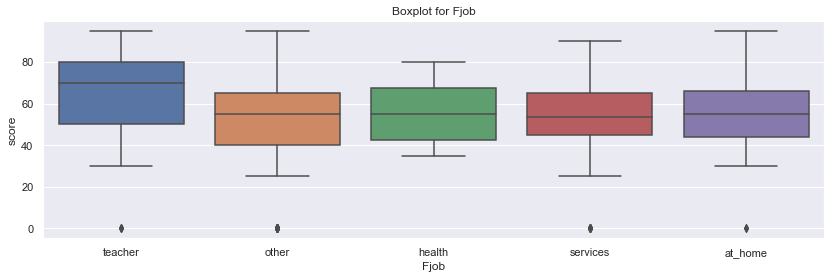

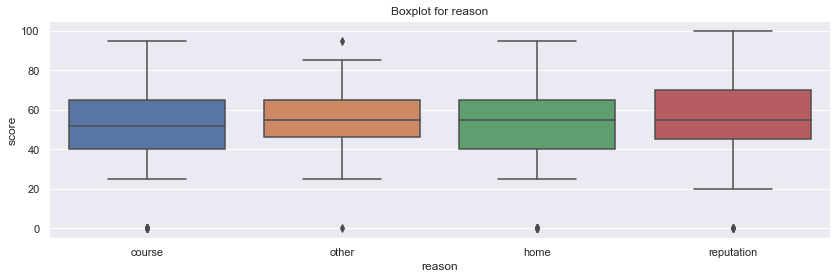

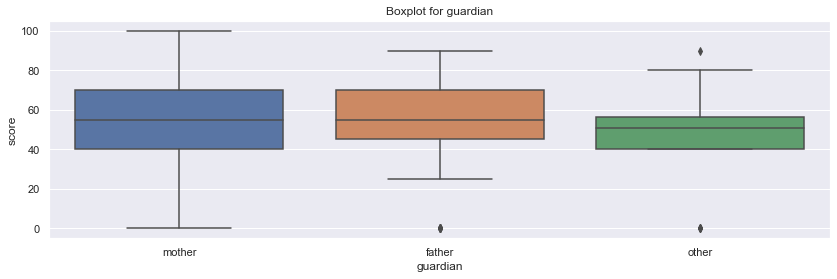

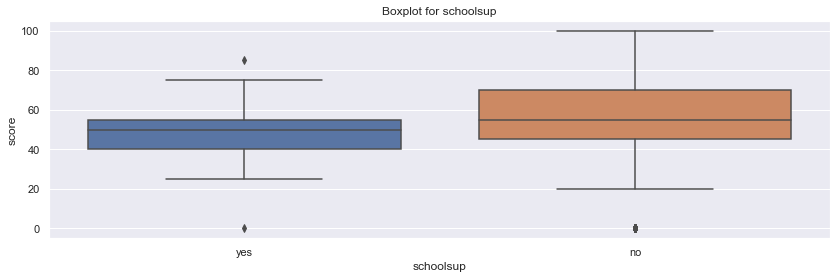

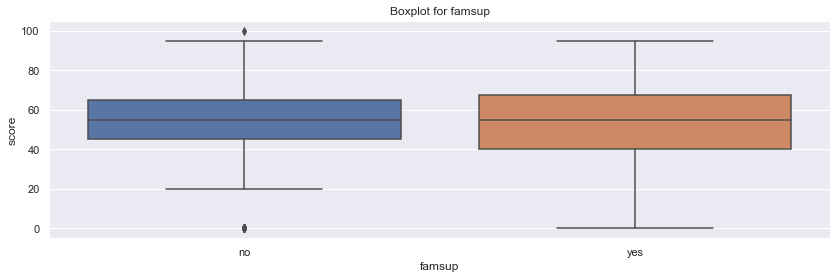

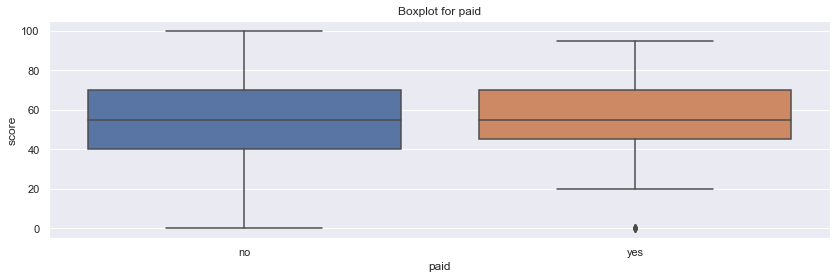

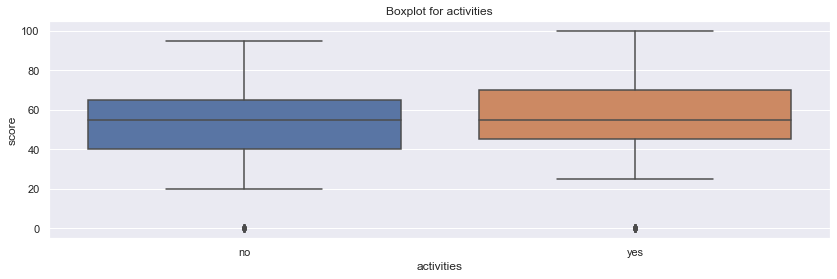

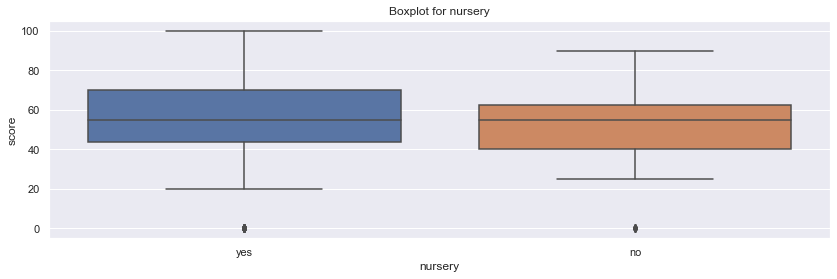

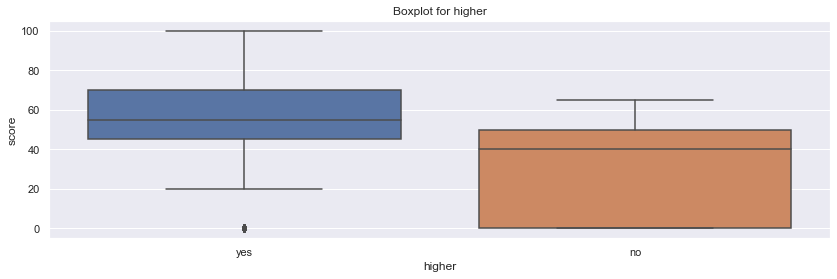

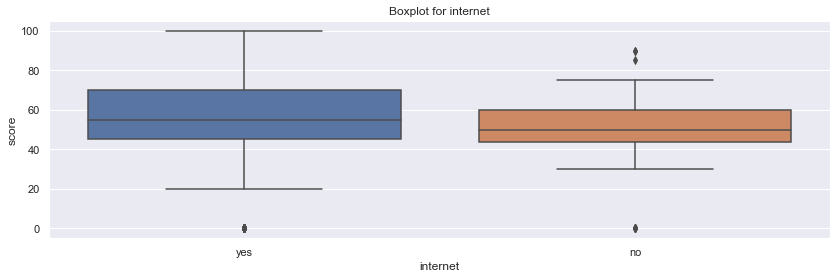

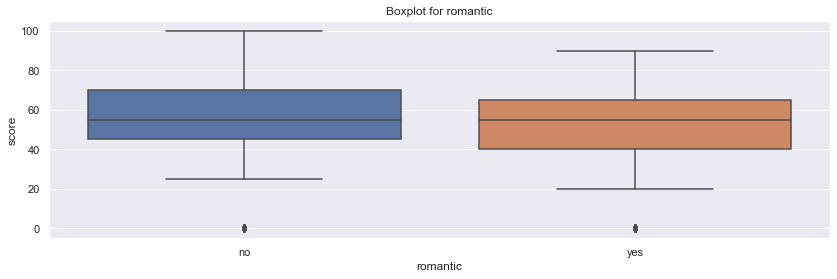

In [66]:
# функция start_boxplor_object для запуска функции построения boxplot номинативных переменных(используем для него сформированный список selected_dtype_obj)
start_boxplor_object(selected_dtype_obj)

Судя по графикам в некоторых параметрах тяжело определить влияние на балы по госэкзамену по матиматике(score). Графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы:
Для этого создадим функцию get_stat_dif, которая выведет статистически значимые различия для колонок.

In [70]:
# Пройдемся по столбцам применив функцию get_stat_dif.
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются четыре параметра: address,  Mjob, higher и  romantic. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: address,  Mjob, higher и  romantic, 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'score'.

In [71]:
stud_for_model = stud.loc[:, ['address', 'Mjob', 'higher', 'romantic', 'age', 'Medu', 'Fedu',
                              'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']]

In [72]:
stud_for_model.head()

,address,Mjob,higher,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences
0,U,at_home,yes,no,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0
1,U,at_home,yes,no,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0
2,U,at_home,yes,NaN,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0
3,U,health,yes,yes,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0
4,U,other,yes,no,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0


In [73]:
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     378 non-null    object 
 1   Mjob        376 non-null    object 
 2   higher      375 non-null    object 
 3   romantic    364 non-null    object 
 4   age         395 non-null    int64  
 5   Medu        395 non-null    float64
 6   Fedu        395 non-null    float64
 7   traveltime  395 non-null    float64
 8   studytime   395 non-null    float64
 9   failures    395 non-null    float64
 10  famrel      395 non-null    float64
 11  freetime    395 non-null    float64
 12  goout       395 non-null    float64
 13  health      395 non-null    float64
 14  absences    395 non-null    float64
dtypes: float64(10), int64(1), object(4)
memory usage: 46.4+ KB


В номинативных переменных, остались ячейки с NaN, но заполнить мы их не можем, т.к. не можем применить среднее или медиану..

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.

Настало время подвести итоги: 

Итак, в результате EDA для анализа влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике:
- предлагается использовать в дальнейшем для построения модели столбцы: 'address', 'Mjob', 'higher', 'romantic', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences'.
- Выбросы, а именно результат ошибки внесенных данных были найдены и очищенны в колонке 'famrel', 'Fedu' и 'absences'.  
- В колонках с числовыми значениями пустых строк было не так много. Заполнили средним значением.
- В колонках с номинативными переменными остались значения с NaN.
